In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import recall_score ,precision_score ,f1_score

from sklearn import preprocessing
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/Rafig77/data/main/credit_risk.csv')
df.head()

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,RENT,3.0,EDUCATION,A,12000,7.90,0,0.17,N,2
1,25,25000,RENT,0.0,MEDICAL,C,8500,12.53,1,0.34,Y,2
2,24,67000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,12150,10.37,0,0.18,N,3
3,23,69000,RENT,7.0,MEDICAL,A,6000,7.88,0,0.09,N,2
4,30,33000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,6000,8.49,0,0.18,N,8


#### Data understanding

In [64]:
# Getting null values
df.isnull().sum()


age                         0
salary                      0
home_ownership              0
employment_time           895
loan_purposes               0
credit_score                0
Credit_Amount               0
loan_rate                3116
Credit_Status               0
loan_percentage             0
Payment_History             0
Credit_History_Length       0
dtype: int64

In [65]:
# Displaying the first few rows of dataset
print(df.head())

   age  salary home_ownership  employment_time      loan_purposes  \
0   23   70000           RENT              3.0          EDUCATION   
1   25   25000           RENT              0.0            MEDICAL   
2   24   67000       MORTGAGE              2.0    HOMEIMPROVEMENT   
3   23   69000           RENT              7.0            MEDICAL   
4   30   33000       MORTGAGE              2.0  DEBTCONSOLIDATION   

  credit_score  Credit_Amount  loan_rate  Credit_Status  loan_percentage  \
0            A          12000       7.90              0             0.17   
1            C           8500      12.53              1             0.34   
2            B          12150      10.37              0             0.18   
3            A           6000       7.88              0             0.09   
4            A           6000       8.49              0             0.18   

  Payment_History  Credit_History_Length  
0               N                      2  
1               Y                      2  

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              32581 non-null  int64  
 1   salary                           32581 non-null  int64  
 2   employment_time                  32581 non-null  float64
 3   Credit_Amount                    32581 non-null  int64  
 4   loan_rate                        32581 non-null  float64
 5   Credit_Status                    32581 non-null  int64  
 6   loan_percentage                  32581 non-null  float64
 7   Credit_History_Length            32581 non-null  int64  
 8   home_ownership_MORTGAGE          32581 non-null  uint8  
 9   home_ownership_OTHER             32581 non-null  uint8  
 10  home_ownership_OWN               32581 non-null  uint8  
 11  home_ownership_RENT              32581 non-null  uint8  
 12  loan_purposes_DEBT

In [ ]:
# Box Plot
sns.set_style('darkgrid')
sns.boxplot(df['age'])
plt.title(Age)
plt.show()


In [ ]:
#Displaying shape and types of dataset
print(df.shape)
print(df.dtypes)

(32581, 12)
age                        int64
salary                     int64
home_ownership            object
employment_time          float64
loan_purposes             object
credit_score              object
Credit_Amount              int64
loan_rate                float64
Credit_Status              int64
loan_percentage          float64
Payment_History           object
Credit_History_Length      int64
dtype: object


In [ ]:
# Heat Map
numerical_columns=list(df.select_dtypes(exclude=object)) # Gettin only numerical features
numerical_columns.remove('Credit_Status') # It is target

corr_matrix=df[numerical_columns].corr()# Getting coorelation matrix
mask = np.triu(np.ones_like(corr_matrix)) # Gettig only upper matrix and setting 0 to lower
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [67]:
# Finding categorical features and unique variables
print(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=['object']).nunique())

Index(['home_ownership', 'loan_purposes', 'credit_score', 'Payment_History'], dtype='object')
home_ownership     4
loan_purposes      6
credit_score       7
Payment_History    2
dtype: int64


#### Checking relationship between features


In [73]:
#Find most and least coorelated columns
min_max=[]
for i in df.columns:
    min_corr = float('inf')  
    max_corr = float('-inf') 
    for a in df.columns:
        corr=df[i].corr(df[a])
        if corr>max_corr:
            max_corr=corr
        if corr>min_corr:
            min_corr=corr   
    print(f"Column: {i}, Min Correlation: {min_corr}, Max Correlation: {max_corr}")

        


Column: age, Min Correlation: inf, Max Correlation: 1.0
Column: salary, Min Correlation: inf, Max Correlation: 0.9999999999999999
Column: employment_time, Min Correlation: inf, Max Correlation: 0.9999999999999998
Column: Credit_Amount, Min Correlation: inf, Max Correlation: 1.0
Column: loan_rate, Min Correlation: inf, Max Correlation: 0.9999999999999999
Column: Credit_Status, Min Correlation: inf, Max Correlation: 1.0
Column: loan_percentage, Min Correlation: inf, Max Correlation: 1.0
Column: Credit_History_Length, Min Correlation: inf, Max Correlation: 1.0
Column: home_ownership_MORTGAGE, Min Correlation: inf, Max Correlation: 1.0
Column: home_ownership_OTHER, Min Correlation: inf, Max Correlation: 1.0
Column: home_ownership_OWN, Min Correlation: inf, Max Correlation: 0.9999999999999998
Column: home_ownership_RENT, Min Correlation: inf, Max Correlation: 1.0
Column: loan_purposes_DEBTCONSOLIDATION, Min Correlation: inf, Max Correlation: 1.0
Column: loan_purposes_EDUCATION, Min Correlat

#### Data Preparation

In [79]:
# Converting categorical values into numerical using one-hot encoding
df=pd.get_dummies(df,columns=['home_ownership', 'loan_purposes', 'credit_score', 'Payment_History'])
from sklearn.model_selection import train_test_split

# Replacing missing values with mean of each column
df=df.replace(np.nan,df['employment_time'].mean())
df=df.replace(np.nan,df['loan_rate'].mean()) #/fillna(0)

#Checking 
print(df.isnull().sum())




age                                0
salary                             0
employment_time                    0
Credit_Amount                      0
loan_rate                          0
Credit_Status                      0
loan_percentage                    0
Credit_History_Length              0
home_ownership_MORTGAGE            0
home_ownership_OTHER               0
home_ownership_OWN                 0
home_ownership_RENT                0
loan_purposes_DEBTCONSOLIDATION    0
loan_purposes_EDUCATION            0
loan_purposes_HOMEIMPROVEMENT      0
loan_purposes_MEDICAL              0
loan_purposes_PERSONAL             0
loan_purposes_VENTURE              0
credit_score_A                     0
credit_score_B                     0
credit_score_C                     0
credit_score_D                     0
credit_score_E                     0
credit_score_F                     0
credit_score_G                     0
Payment_History_N                  0
Payment_History_Y                  0
d

In [82]:
# Feature enginnering
selected_features = ['age', 'salary', 'home_ownership', 'employment_time', 'loan_purposes']
df['age_squared']=df['age']**2
df['Credit_Amount  ']=np.log(df['Credit_Amount'])

df['His_rate'] = df['Credit_History_Length'] + df['loan_rate']
print(df['His_rate'].corr(df['Credit_Status'])) # It is least coorelated with our target

0.17263027059081626


### Modeling


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X=df.drop('Credit_Status',axis=1)
y=df['Credit_Status']
X_train,X_test,y_train ,y_test = train_test_split(X,y ,test_size= 0.4,random_state= 42 , shuffle= True,stratify= y)

# Using decison tree
clf = DecisionTreeClassifier(max_depth= 6)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_train_pred = clf.predict(X_train)

test_accuracy=clf.fit(X_train,y_train).score(X_test,y_test)
train_accuracy=clf.fit(X_train,y_train).score(X_train,y_train)
print(f"test_accuracy: {test_accuracy}, train_accuracy: {train_accuracy}")




test_accuracy: 0.9181308984884524, train_accuracy: 0.92280540208717


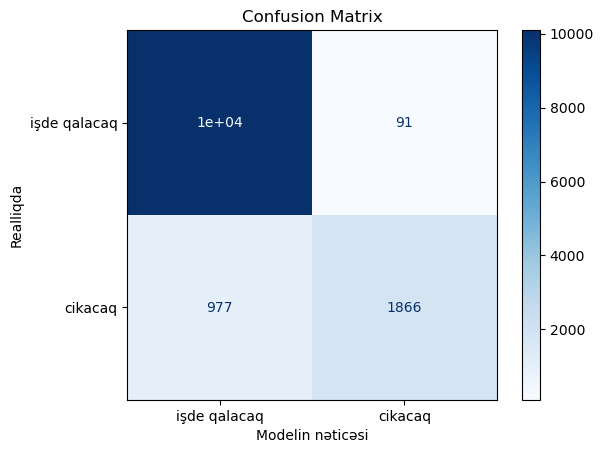

In [89]:
conf = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['işde qalacaq', 'cikacaq'])

# Plot the confusion matrix
cm_display.plot(include_values=True, cmap='Blues', ax=plt.gca())

# Customize the appearance of the plot
plt.title('Confusion Matrix')
plt.xlabel('Modelin nəticəsi')
plt.ylabel('Realliqda')
plt.grid(False)

# Show the plot
plt.show()

In [ ]:
f1_score_test=f1_score(y_test,y_pred)
f1_score_train=f1_score(y_train,y_train_pred)
print(f"test f1: {f1_score_test}, train f1: {f1_score_train}")

prec_train=precision_score(y_train , y_train_pred)
prec_test=precision_score(y_test, y_pred)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

random_model = RandomForestClassifier(n_estimators= 100,max_depth= 7)
random_model.fit(X_train,y_train)
print('Test accuracy :' ,f1_score (random_model.predict(X_test),y_test))

print('Train accuracy :',f1_score (random_model.predict(X_train),y_train))